### Read training, dev and unlabeled test data

The following provides a starting code (Python 3) of how to read the labeled training and dev cipher text, and unlabeled test cipher text, into lists.

In [1]:
train, dev, test = [], [], []

In [2]:
for x in open('./train_enc.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r').split('\t')
    # x[0] will be the label (0 or 1), and x[1] will be the ciphertext sentence.
    x[0] = int(x[0]) 
    train.append(x)
print (len(train))
print (train[:3])

16220
[[0, 'lkêcê yoúc cêêö y#êjl lw mówám Újám j Úêê# ütlk Úol lkêú z#ê ctöé8ú ówl xoóóú éê#xw#öê#c .'], [0, '6êcétlê jolêot8 zc éê#xw#öjóáê , tl zc j #jlkê# 8tcl8êcc jöÚ8ê 6wüó lkê öt668ê wx lkê #wj6 , ükê#ê lkê lkêöjltá t#wótêc j#ê lww wÚ2twoc jó6 lkê cê+oj8 éw8tltác lww cöoy .'], [0, 'tx lktc kw8t6jú öw2tê tc coééwcê6 lw Úê j ytxl , cwöêÚw6ú oóü#jééê6 tl êj#8ú , lwwm wol j88 lkê yww6 cloxx , jó6 8êxl Úêktó6 lkê á#jé ( 8tlê#j88ú ) .']]


In [3]:
for x in open('./dev_enc.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r').split('\t')
    # x[0] will be the label (0 or 1), and x[1] will be the ciphertext sentence.
    x[0] = int(x[0]) 
    dev.append(x)
print (len(dev))
print (dev[:3])

2027
[[1, 'ów8jó Ú#j2ê8ú l#êj6c ükê#ê xêü jöê#tájó xt8öc 6j#ê lw 6ê82ê 77 tólw lkê üw#86 wx jöÚt2j8êóáê jó6 jöÚtyotlú <<<'], [0, 'ê2êó öo#ékú zc ê+éê#l áwötá ltötóy jó6 xjöê6 ákj#tcöj áj ózl #êcáoê lktc êxxw#l .'], [1, 'üt88 jcco#ê68ú #jóm jc wóê wx lkê á8ê2ê#êcl , öwcl 6êáêélt2ê8ú jöoctóy áwöê6têc wx lkê úêj# .']]


#### Different from 'train' and 'dev' that are both list of tuples, 'test' will be just a list.

In [4]:
for x in open('./test_enc_unlabeled.tsv', encoding='utf-8'):
    x = x.rstrip('\n\r')
    test.append(x)
print (len(test))
print (test[:3])

2028
['j 6t6jáltá jó6 6o88 6wáoöêólj#ú y8w#txútóy cwxlüj#ê jój#ákú .', 'ówlktóy cltámc , #êj88ú , ê+áêél j 8tóyê#tóy á#êêétóêcc wóê xêê8c x#wö Úêtóy 6#jyyê6 lk#woyk j cj6 , cw#6t6 oót2ê#cê wx yoóc , 6#oyc , j2j#táê jó6 6jöjyê6 6#êjöc .', 'öo#ékú jó6 üt8cwó jáloj88ú öjmê j é#êllú yww6 lêjö <<< Úol lkê é#wvêál co##woó6tóy lkêö tc 6tcl#êcctóy8ú #wlê .']


#### You can split every sentence into lists of words by white spaces.

In [5]:
train_split = [[x[0], x[1].split(' ')] for x in train]
dev_split = [[x[0], x[1].split(' ')] for x in dev]
test_split = [[x.split(' ')] for x in test]

In [6]:
print(train_split[0])
print(dev_split[0])
print(test_split[0])

[0, ['lkêcê', 'yoúc', 'cêêö', 'y#êjl', 'lw', 'mówám', 'Újám', 'j', 'Úêê#', 'ütlk', 'Úol', 'lkêú', 'z#ê', 'ctöé8ú', 'ówl', 'xoóóú', 'éê#xw#öê#c', '.']]
[1, ['ów8jó', 'Ú#j2ê8ú', 'l#êj6c', 'ükê#ê', 'xêü', 'jöê#tájó', 'xt8öc', '6j#ê', 'lw', '6ê82ê', '77', 'tólw', 'lkê', 'üw#86', 'wx', 'jöÚt2j8êóáê', 'jó6', 'jöÚtyotlú', '<<<']]
[['j', '6t6jáltá', 'jó6', '6o88', '6wáoöêólj#ú', 'y8w#txútóy', 'cwxlüj#ê', 'jój#ákú', '.']]


### Main Code Body

You may choose to experiment with different methods using your program. However, you need to embed the training and inference processes at here. We will use your prediction on the unlabeled test data to grade, while checking this part to understand how your method has produced the predictions.

In [8]:
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

E:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
E:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [9]:
x_train = [" ".join(data[1]) for data in train_split]
print(x_train[:2])
x_test = [" ".join(data[1]) for data in dev_split]
print(x_test[:2])
test_data = [" ".join(data[0]) for data in test_split]
print(test_data[:2])

['lkêcê yoúc cêêö y#êjl lw mówám Újám j Úêê# ütlk Úol lkêú z#ê ctöé8ú ówl xoóóú éê#xw#öê#c .', '6êcétlê jolêot8 zc éê#xw#öjóáê , tl zc j #jlkê# 8tcl8êcc jöÚ8ê 6wüó lkê öt668ê wx lkê #wj6 , ükê#ê lkê lkêöjltá t#wótêc j#ê lww wÚ2twoc jó6 lkê cê+oj8 éw8tltác lww cöoy .']
['ów8jó Ú#j2ê8ú l#êj6c ükê#ê xêü jöê#tájó xt8öc 6j#ê lw 6ê82ê 77 tólw lkê üw#86 wx jöÚt2j8êóáê jó6 jöÚtyotlú <<<', 'ê2êó öo#ékú zc ê+éê#l áwötá ltötóy jó6 xjöê6 ákj#tcöj áj ózl #êcáoê lktc êxxw#l .']
['j 6t6jáltá jó6 6o88 6wáoöêólj#ú y8w#txútóy cwxlüj#ê jój#ákú .', 'ówlktóy cltámc , #êj88ú , ê+áêél j 8tóyê#tóy á#êêétóêcc wóê xêê8c x#wö Úêtóy 6#jyyê6 lk#woyk j cj6 , cw#6t6 oót2ê#cê wx yoóc , 6#oyc , j2j#táê jó6 6jöjyê6 6#êjöc .']


In [10]:
y_train = [data[0] for data in train_split]
print(y_train[:3])
print(len(x_train),len(y_train))
y_test = [data[0] for data in dev_split]
print(len(x_test),len(y_test))

[0, 0, 0]
16220 16220
2027 2027


In [11]:
tf_vectorizer=TfidfVectorizer(sublinear_tf=True,min_df=4,max_df=0.3,ngram_range=(1,3))
x_train_tfidf=tf_vectorizer.fit_transform(x_train)
x_test_tfidf=tf_vectorizer.transform(x_test)

### TF-IDF+SVM

In [12]:
# clf = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#      verbose=0)
# clf.fit(x_train_tfidf, y_train)

LinearSVC()

In [13]:
# clf.score(x_test_tfidf,y_test)

0.8914652195362605

In [14]:
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# clf = svm.LinearSVC()
# dual = [True,False]
# loss = ['squared_hinge','hinge']
# penalty = ['l2']  #he ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties
# c_values = [ 10, 1.0, 0.1, 0.01] 
# # define grid search
# grid = dict(dual=dual,loss = loss,penalty=penalty,C=c_values)
# grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train_tfidf, y_train)

In [15]:
# summarize results
# print("Grid_accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Grid_accuracy: 0.862762 using {'C': 1.0, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [16]:
# finding best estimator..#
# grid_result.best_estimator_

LinearSVC()

In [17]:
# clf = svm.LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#      verbose=0)
# clf.fit(x_train_tfidf, y_train)
# clf.score(x_test_tfidf,y_test)

0.8914652195362605

### TF-IDF+Logistic Regression(best accuracy)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
tf_vectorizer=TfidfVectorizer(sublinear_tf=True,min_df=4,max_df=0.3,ngram_range=(1,3))
x_train_tfidf=tf_vectorizer.fit_transform(x_train)
x_test_tfidf=tf_vectorizer.transform(x_test)
test = tf_vectorizer.transform(test_data)

In [20]:
lr.fit(x_train_tfidf,y_train)

LogisticRegression()

In [21]:
lr.fit(x_train_tfidf,y_train)
lr.score(x_test_tfidf,y_test)

0.8554514060187469

In [22]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'sag'] 
penalty = ['l2']  #he ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties
c_values = [ 10, 1.0, 0.1, 0.01] 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_tfidf, y_train)

In [23]:
# summarize results
print("Grid_accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Grid_accuracy: 0.863502 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [24]:
# finding best estimator..#
grid_result.best_estimator_

LogisticRegression(C=10)

In [25]:
l_r=LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
l_r.fit(x_train_tfidf, y_train)

LogisticRegression(C=10.0)

In [26]:
l_r.score(x_test_tfidf,y_test)

0.8924518993586581

In [27]:
results = l_r.predict(test)
print(len(results))

2028


### TF-IDF+Naive Bayes

In [28]:
# from sklearn.naive_bayes import MultinomialNB
# nb=MultinomialNB(alpha=1.0,fit_prior=True)

In [29]:
# model=nb.fit(x_train_tfidf, y_train)
# model.score(x_test_tfidf,y_test)

0.8500246669955599

In [30]:
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# nb = MultinomialNB()
# fit_prior = [True,False]
# alpha = [ 10, 1.0, 0.1, 0.01] 
# # define grid search
# grid = dict(fit_prior=fit_prior,alpha=alpha)
# grid_search = GridSearchCV(estimator=nb, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train_tfidf, y_train)

In [31]:
# summarize results
# print("Grid_accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # finding best estimator..#
# grid_result.best_estimator_

Grid_accuracy: 0.844020 using {'alpha': 0.1, 'fit_prior': True}


MultinomialNB(alpha=0.1)

In [32]:
# nb=MultinomialNB(alpha=0.1,fit_prior=True)
# model=nb.fit(x_train_tfidf, y_train)
# model.score(x_test_tfidf,y_test)

0.8608781450419339

### TF-IDF+Random Forest

In [98]:
# from sklearn.ensemble import RandomForestClassifier
# rf= RandomForestClassifier(n_estimators=1000,criterion='gini',n_jobs=-1)

In [65]:
# model2=rf.fit(x_train_tfidf, y_train)
# model2.score(x_test_tfidf,y_test)

0.8663048840651209

In [66]:
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# rf = RandomForestClassifier()
# n_estimators=[200,500,800,1000,1500]
# criterion=['gini','entropy']
# # define grid search
# grid = dict(n_estimators=n_estimators,criterion=criterion)
# grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train_tfidf, y_train)

In [67]:
# summarize results
# print("Grid_accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # finding best estimator..#
# grid_result.best_estimator_

Grid_accuracy: 0.838594 using {'criterion': 'entropy', 'n_estimators': 800}


RandomForestClassifier(criterion='entropy', n_estimators=800)

In [99]:
# rf= RandomForestClassifier(n_estimators=800,criterion='entropy',n_jobs=-1)
# model2=rf.fit(x_train_tfidf, y_train)
# model2.score(x_test_tfidf,y_test)

0.8598914652195363

### TF-IDF+CatBoost

In [100]:
# from catboost import CatBoostClassifier
# cb=CatBoostClassifier(iterations=150,learning_rate= 0.20)
# cb.fit(x_train_tfidf,y_train)

0:	learn: 0.6843684	total: 354ms	remaining: 52.8s
1:	learn: 0.6760235	total: 673ms	remaining: 49.8s
2:	learn: 0.6705911	total: 997ms	remaining: 48.8s
3:	learn: 0.6660639	total: 1.31s	remaining: 47.9s
4:	learn: 0.6621720	total: 1.64s	remaining: 47.6s
5:	learn: 0.6583535	total: 1.96s	remaining: 47.1s
6:	learn: 0.6553478	total: 2.29s	remaining: 46.7s
7:	learn: 0.6515497	total: 2.61s	remaining: 46.3s
8:	learn: 0.6483372	total: 2.94s	remaining: 46s
9:	learn: 0.6448861	total: 3.26s	remaining: 45.6s
10:	learn: 0.6423550	total: 3.58s	remaining: 45.2s
11:	learn: 0.6389417	total: 3.9s	remaining: 44.8s
12:	learn: 0.6364073	total: 4.22s	remaining: 44.5s
13:	learn: 0.6334224	total: 4.54s	remaining: 44.1s
14:	learn: 0.6304999	total: 4.85s	remaining: 43.7s
15:	learn: 0.6281039	total: 5.17s	remaining: 43.3s
16:	learn: 0.6259048	total: 5.5s	remaining: 43s
17:	learn: 0.6239057	total: 5.82s	remaining: 42.7s
18:	learn: 0.6215853	total: 6.14s	remaining: 42.3s
19:	learn: 0.6193127	total: 6.46s	remaining: 42

In [101]:
# cb.score(x_test_tfidf,y_test)

0.7923038973852985

### Word2Vec+BiLSTM

In [ ]:
# import numpy as np
# from gensim.models import Word2Vec
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [10]:
# train_label = np.array([[data[0]] for data in train_split])
# print(train_label)
# train_data = [data[1] for data in train_split]
# print(train_data[:3])

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
[['lkêcê', 'yoúc', 'cêêö', 'y#êjl', 'lw', 'mówám', 'Újám', 'j', 'Úêê#', 'ütlk', 'Úol', 'lkêú', 'z#ê', 'ctöé8ú', 'ówl', 'xoóóú', 'éê#xw#öê#c', '.'], ['6êcétlê', 'jolêot8', 'zc', 'éê#xw#öjóáê', ',', 'tl', 'zc', 'j', '#jlkê#', '8tcl8êcc', 'jöÚ8ê', '6wüó', 'lkê', 'öt668ê', 'wx', 'lkê', '#wj6', ',', 'ükê#ê', 'lkê', 'lkêöjltá', 't#wótêc', 'j#ê', 'lww', 'wÚ2twoc', 'jó6', 'lkê', 'cê+oj8', 'éw8tltác', 'lww', 'cöoy', '.'], ['tx', 'lktc', 'kw8t6jú', 'öw2tê', 'tc', 'coééwcê6', 'lw', 'Úê', 'j', 'ytxl', ',', 'cwöêÚw6ú', 'oóü#jééê6', 'tl', 'êj#8ú', ',', 'lwwm', 'wol', 'j88', 'lkê', 'yww6', 'cloxx', ',', 'jó6', '8êxl', 'Úêktó6', 'lkê', 'á#jé', '(', '8tlê#j88ú', ')', '.']]


In [18]:
# dev_label = [[data[0]] for data in dev_split]
# dev_data = [data[1] for data in dev_split]
# test_data = [data[0] for data in test_split]
# print(test_data[:3])

[['j', '6t6jáltá', 'jó6', '6o88', '6wáoöêólj#ú', 'y8w#txútóy', 'cwxlüj#ê', 'jój#ákú', '.'], ['ówlktóy', 'cltámc', ',', '#êj88ú', ',', 'ê+áêél', 'j', '8tóyê#tóy', 'á#êêétóêcc', 'wóê', 'xêê8c', 'x#wö', 'Úêtóy', '6#jyyê6', 'lk#woyk', 'j', 'cj6', ',', 'cw#6t6', 'oót2ê#cê', 'wx', 'yoóc', ',', '6#oyc', ',', 'j2j#táê', 'jó6', '6jöjyê6', '6#êjöc', '.'], ['öo#ékú', 'jó6', 'üt8cwó', 'jáloj88ú', 'öjmê', 'j', 'é#êllú', 'yww6', 'lêjö', '<<<', 'Úol', 'lkê', 'é#wvêál', 'co##woó6tóy', 'lkêö', 'tc', '6tcl#êcctóy8ú', '#wlê', '.']]


In [12]:
# print(max([len(x[0]) for x in test_split]))

59


In [14]:
# Embedding_dimensions = 100
# word2vec_model = Word2Vec(train_data,
#                  size=Embedding_dimensions,
#                  workers=8,
#                  min_count=5)
# print("Vocabulary Length:", len(word2vec_model.wv.index2word))

Vocabulary Length: 6080


In [15]:
# Defining the model input length.
# input_length = 65

In [16]:
# vocab_length = 7000

# tokenizer = Tokenizer(filters="", lower=False)
# tokenizer.fit_on_texts(train_data+dev_data)
# tokenizer.num_words = vocab_length
# print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 7000


In [20]:
# X_train = pad_sequences(tokenizer.texts_to_sequences(train_data), maxlen=input_length)
# X_dev  = pad_sequences(tokenizer.texts_to_sequences(dev_data) , maxlen=input_length)
# X_test = pad_sequences(tokenizer.texts_to_sequences(test_data) , maxlen=input_length)
# print("X_train.shape:", X_train.shape)
# print("X_dev.shape :", X_dev.shape)
# print("X_test.shape :", X_test.shape)

X_train.shape: (16220, 65)
X_dev.shape : (2027, 65)
X_test.shape : (2028, 65)


In [21]:
# embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

# for word, token in tokenizer.word_index.items():
#     if word2vec_model.wv.__contains__(word):
#         embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

# print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (7000, 100)


In [23]:
# def getModel():
#     embedding_layer = Embedding(input_dim = vocab_length,
#                                 output_dim = Embedding_dimensions,
#                                 weights=[embedding_matrix],
#                                 input_length=input_length,
#                                 trainable=False)

#     model = Sequential([
#         embedding_layer,
#         Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
#         Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
#         Conv1D(100, 5, activation='relu'),
#         GlobalMaxPool1D(),
#         Dense(16, activation='relu'),
#         Dense(1, activation='sigmoid'),
#     ],
#     name="Classify_Model")
#     return model

In [24]:
# training_model = getModel()
# training_model.summary()

Model: "Classify_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 65, 100)           700000    
                                                                 
 bidirectional (Bidirectiona  (None, 65, 200)          160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 65, 200)          240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 61, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                    

In [25]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [26]:
# training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# history = training_model.fit(
#     X_train, train_label,
#     batch_size=1024,
#     epochs=30,
#     validation_split=0.1,
#     callbacks=callbacks,
#     verbose=1,
# )

Epoch 1/30
15/15 [==============================] - 90s 6s/step - loss: 0.6838 - accuracy: 0.5459 - val_loss: 0.6774 - val_accuracy: 0.5851 - lr: 0.0010
Epoch 2/30
15/15 [==============================] - 83s 6s/step - loss: 0.6747 - accuracy: 0.5833 - val_loss: 0.6657 - val_accuracy: 0.6005 - lr: 0.0010
Epoch 3/30
15/15 [==============================] - 85s 6s/step - loss: 0.6697 - accuracy: 0.5919 - val_loss: 0.6637 - val_accuracy: 0.6048 - lr: 0.0010
Epoch 4/30
15/15 [==============================] - 87s 6s/step - loss: 0.6676 - accuracy: 0.5960 - val_loss: 0.6615 - val_accuracy: 0.5943 - lr: 0.0010
Epoch 5/30
15/15 [==============================] - 88s 6s/step - loss: 0.6663 - accuracy: 0.5982 - val_loss: 0.6614 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 6/30
15/15 [==============================] - 90s 6s/step - loss: 0.6614 - accuracy: 0.6021 - val_loss: 0.6543 - val_accuracy: 0.6141 - lr: 0.0010
Epoch 7/30
15/15 [==============================] - 92s 6s/step - loss: 0.6590 - a

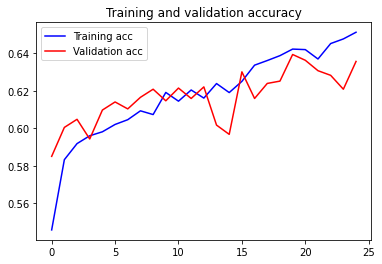

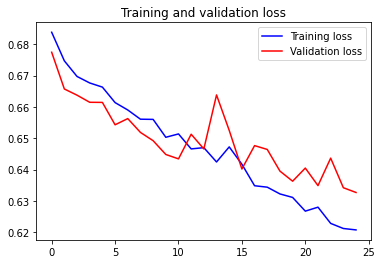

In [28]:
# import matplotlib.pyplot as plt

# acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
# loss, val_loss = history.history['loss'], history.history['val_loss']
# epochs = range(len(acc))

# plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

### Output Prediction Result File

You will need to submit a prediction result file. It should have 2028 lines, every line should be either 0 or 1, which is your model's prediction on the respective test set instance.

In [33]:
# suppose you had your model's predictions on the 2028 test cases read from test_enc_unlabeled.tsv, and 
#those results are in the list called 'results'
print(len(results))
assert (len(results) == 2028)

2028


In [34]:
# make sure the results are not float numbers, but intergers 0 and 1
results = [int(x) for x in results]

In [35]:
# write your prediction results to 'upload_predictions.txt' and upload that later
with open('upload_predictions.txt', 'w', encoding = 'utf-8') as fp:
    for x in results:
        fp.write(str(x) + '\n')